# 3. **kNN**

## a. What is **kNN** algorithm?

### I. Characteristics

* **Instance-based**: Instead of modeling the training data to make predictions, kNN works by memorizing the training dataset.
* **Lazy learning**: kNN is considered a lazy learning algorithm because it does not learn a discriminative function from the training data but "memorizes" the dataset instead.

### II. Working Principle

* Given a new, unknown observation, kNN goes through the entire dataset to find the *k* training examples that are closest to the point and returns the output value (for regression) or the most common class (for classification) of the *k* instances.
* The "closeness" is typically determined using distance metrics like Euclidean, Manhattan, or Minkowski Distance.

### III. Distance Metrics

* **Euclidean Distance**: It's the length of the segment connecting two points. This is one of the most commonly used methods.
* **Manhattan Distance**: Also known as "city block" distance. It's the distance between two points measured along axes at right angles.
* **Minkowski Distance** is a generalized metric to measure distance in a space, encompassing metrics like Euclidean and Manhattan based on a parameter.

### IV. Choosing *k*

* *k* is a user-defined constant. A small value of *k* means that noise will have a higher influence on the result, and a large value makes it computationally expensive.
* Cross-validation is often used to determine an optimal *k* value.

### V. Advantages

* Simple and easy to implement.
* No assumptions about the characteristics of the concepts to learn (non-parametric).
* Constantly evolves as it learns from new training data.

### VI. Disadvantages

* Computationally intensive, especially for large datasets, as it searches through each data point to compute distances.
* Storage of data can be a challenge since it requires storing the entire dataset.
* Sensitive to irrelevant features and the scale of the dataset. Feature scaling (like normalization) is often required.

### VII. Applications

* kNN can be used for both classification and regression problems.
* Commonly used for its simplicity in recommendation systems, image recognition, and pattern recognition.

## b. Implementation of the **kNN** algorithm **using only NumPy**

**Plan**:
1. Create a Dataset: A 2D dataset where each data point represents a coordinate (x,y) with values between 0 and 1.
2. Implement KNN:
  * Compute the Euclidean distance.
  * Sort the distances and select the top 'k'.
  * Count the number of occurrences of each class within the 'k' samples.
  * Return the class with the highest count.

### **Step 1**: Create a 2D Dataset

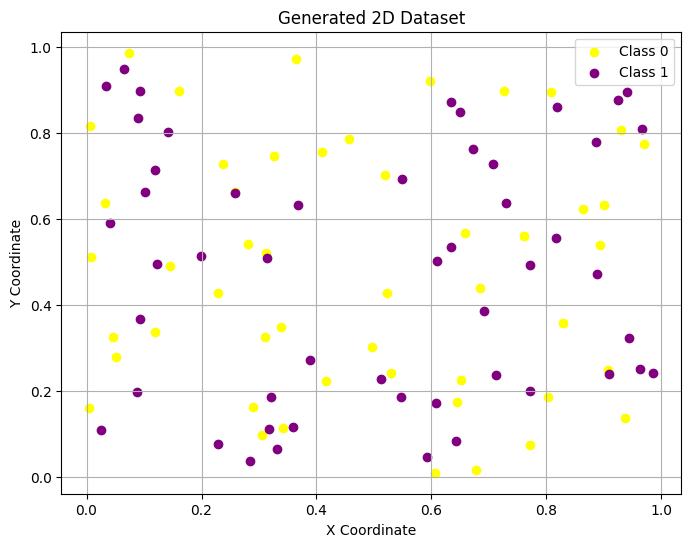

In [ ]:
import matplotlib.pyplot as plt

# Number of data points
num_data_points = 100

# Generating random coordinates between 0 and 1 for x and y
X = np.random.rand(num_data_points, 2)

# Generating random labels (0 or 1) for each coordinate for demonstration purposes
y = np.random.randint(0, 2, num_data_points)

# Visualizing the generated dataset

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='yellow', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='purple', label='Class 1')
plt.title('Generated 2D Dataset')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()


### Step 2: Implementing kNN

We'll now implement the kNN classifier. The classifier will be able to:

* Store training data.
* Predict the class label for new data points.
* Compute the Euclidean distance to find nearest neighbors.

In [ ]:
class KNearestNeighbors:
    def __init__(self, k=3):
        """
        Initialize the KNN classifier.

        Parameters:
        - k: Number of neighbors to consider. Default is 3.
        """
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        """
        Fit the training data to the classifier. For KNN, this method just stores the data.

        Parameters:
        - X_train: Training data.
        - y_train: Labels for training data.
        """
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        # Exercise: Try implementing it on your own.
        # Hint: Try implementing it by referencing the visualize_neighbors function.
        """
        Predict the labels for test data.

        Parameters:
        - X_test: Test data.

        Returns:
        - Predicted labels for the test data.
        """
        # Placeholder for predictions
        y_pred = np.empty(X_test.shape[0], dtype=self.y_train.dtype)

        # For each test data point
        for i, x in enumerate(X_test):
          pass # delete this line
            # 1. Compute the Euclidean distance to all points in the training set

            # 2. Get the indices of the k smallest distances

            # 3. Fetch the labels of the k nearest neighbor training samples

            # 4. Use the most common class label as the prediction

        return y_pred

    def visualize_neighbors(self, x):
        """
        Visualize the nearest neighbors of a given data point.

        Parameters:
        - x: The data point.

        Returns:
        - A plot showing the data point and its neighbors.
        """
        # Compute the Euclidean distance to all points in the training set
        distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))

        # Get the indices of the k smallest distances
        k_indices = np.argsort(distances)[:self.k]

        # Plotting
        plt.figure(figsize=(8, 6))

        # Plot all data points
        plt.scatter(self.X_train[:, 0], self.X_train[:, 1], color='gray', label='Data Points')

        # Highlight the k nearest neighbors
        plt.scatter(self.X_train[k_indices, 0], self.X_train[k_indices, 1], color='blue', label='k Neighbors')

        # Highlight the input data point
        plt.scatter(x[0], x[1], color='red', s=100, edgecolor='black', label='Input Point')

        # Draw lines between the input data point and its neighbors
        for neighbor in self.X_train[k_indices]:
            plt.plot([x[0], neighbor[0]], [x[1], neighbor[1]], 'g--', linewidth=0.6)

        plt.title(f'{self.k} Nearest Neighbors of the Input Point')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.legend()
        plt.grid(True)
        plt.show()



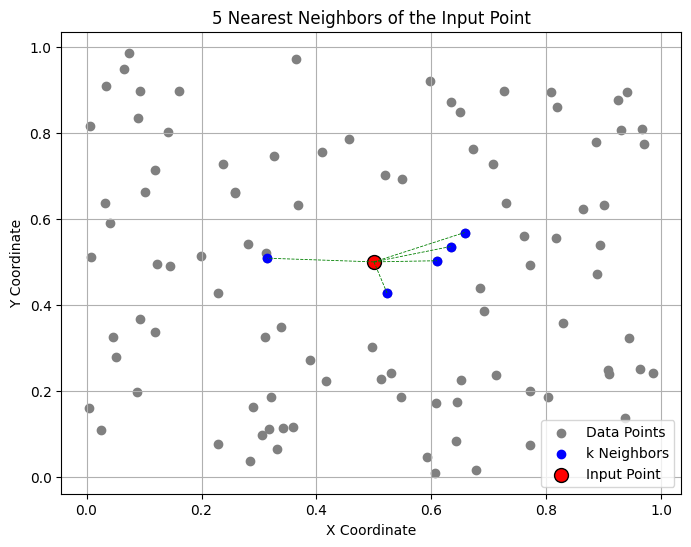

In [ ]:
# Initializing the KNN classifier with k=5 for demonstration purposes
knn = KNearestNeighbors(k=5)
knn.fit(X, y)

# Testing the visualization method with a random point (0.5, 0.5)
knn.visualize_neighbors(np.array([0.5, 0.5]))

This visualization gives an intuitive understanding of how the KNN algorithm works: it identifies the *k* closest data points in the training set for a given input and uses their labels to make a prediction.

**Now, implement the predict function to predict the label of the data point as follows!**

In [ ]:
# Step 1: Generate 10 random 2D data points
random_test_data = np.random.rand(10, 2)

# Step 2: Predict the labels for the random test data using the KNN classifier
predicted_labels = knn.predict(random_test_data)

# Displaying the predicted labels and visualizing each data point
for i, (data_point, label) in enumerate(zip(random_test_data, predicted_labels)):
    print(f"Data Point {i+1}: {data_point}, Predicted Label: Class {label}")

Data Point 1: [0.5113424  0.50151629], Predicted Label: Class 0
Data Point 2: [0.79829518 0.64996393], Predicted Label: Class 0
Data Point 3: [0.70196688 0.79579267], Predicted Label: Class 1
Data Point 4: [0.89000534 0.33799516], Predicted Label: Class 1
Data Point 5: [0.37558295 0.09398194], Predicted Label: Class 1
Data Point 6: [0.57828014 0.03594227], Predicted Label: Class 1
Data Point 7: [0.46559802 0.54264463], Predicted Label: Class 1
Data Point 8: [0.28654125 0.59083326], Predicted Label: Class 0
Data Point 9: [0.03050025 0.03734819], Predicted Label: Class 1
Data Point 10: [0.82260056 0.36019064], Predicted Label: Class 1


output(example):

Data Point 1: [0.5113424  0.50151629], Predicted Label: Class 0

Data Point 2: [0.79829518 0.64996393], Predicted Label: Class 0

Data Point 3: [0.70196688 0.79579267], Predicted Label: Class 1

Data Point 4: [0.89000534 0.33799516], Predicted Label: Class 1

Data Point 5: [0.37558295 0.09398194], Predicted Label: Class 1

Data Point 6: [0.57828014 0.03594227], Predicted Label: Class 1

Data Point 7: [0.46559802 0.54264463], Predicted Label: Class 1

Data Point 8: [0.28654125 0.59083326], Predicted Label: Class 0

Data Point 9: [0.03050025 0.03734819], Predicted Label: Class 1

Data Point 10: [0.82260056 0.36019064], Predicted Label: Class 1

# Solutions

### Creating Arrays in Various Ways

In [ ]:
arr_zeros = np.zeros((3,3))

In [ ]:
arr_ones = np.ones((5,5))
sum_values = np.sum(arr_ones)

In [ ]:
arr_full = np.full((4,4), 7)

In [ ]:
arr_eye = np.eye(6)

### Indexing and Slicing

In [5]:
arr = np.random.randint(0, 100, (10,10))
arr = np.where(arr > 50, -1, arr)
arr

array([[-1, 41, -1, -1, -1, 48, -1, -1, 11, -1],
       [43, 15, 34, 19, 27,  4, -1, 46, -1, 45],
       [44, -1, -1, -1, 29,  4, -1, 24, -1, 26],
       [-1, -1, -1, -1,  3, 49, -1, 28, -1, -1],
       [-1, -1, -1, 29, 32, 43, 19, 20, 36, 34],
       [-1, 29, -1, 42, -1, -1, -1,  4, -1, 15],
       [13,  3, -1, -1, -1, 17, -1, -1,  4, -1],
       [-1, 29, 23, 12, 16, -1, -1, -1, -1, 16],
       [-1, -1, -1, 11, -1, 30, -1, 34, -1, -1],
       [-1, -1, 34, 31, 45, -1, 18, 14, 42, 25]])

In [7]:
arr = np.random.randint(1, 10, (6,6))
diagonal = arr[np.arange(6), np.arange(6)]

array([5, 8, 5, 7, 2, 9])

In [8]:
arr

array([[5, 6, 8, 1, 3, 6],
       [2, 8, 6, 5, 4, 2],
       [6, 2, 5, 1, 9, 2],
       [1, 2, 4, 7, 4, 3],
       [9, 5, 4, 2, 2, 5],
       [2, 9, 8, 5, 3, 9]])

In [9]:
diagonal

array([5, 8, 5, 7, 2, 9])

In [10]:
arr = np.zeros((8,8))
arr[::2, :] = 1
arr

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

### Array Operations

In [ ]:
arr = np.arange(1, 25).reshape(8, 3)
reshaped_arr = arr.reshape(4, 6)

In [ ]:
arr = np.random.randint(1, 50, (5, 7))
transposed_arr = arr.transpose()

In [ ]:
arr = np.arange(1, 25).reshape(3, 2, 4)
transposed_arr = arr.transpose(1, 0, 2)
final_arr = transposed_arr.reshape(6, 4)

### Broadcasting

In [ ]:
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([10, 20])
result1 = arr1 + arr2

In [ ]:
arr3 = np.array([[1], [2], [3]])
arr4 = np.array([0, 1, 2])
result2 = arr3 * arr4

In [ ]:
arr5 = np.random.randint(1, 10, (3,3,3))
arr6 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
result3 = arr5 + arr6

### Implementing kNN

In [ ]:
class KNearestNeighbors:
    def __init__(self, k=3):
        """
        Initialize the KNN classifier.

        Parameters:
        - k: Number of neighbors to consider. Default is 3.
        """
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        """
        Fit the training data to the classifier. For KNN, this method just stores the data.

        Parameters:
        - X_train: Training data.
        - y_train: Labels for training data.
        """
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        """
        Predict the labels for test data.

        Parameters:
        - X_test: Test data.

        Returns:
        - Predicted labels for the test data.
        """
        # Placeholder for predictions
        y_pred = np.empty(X_test.shape[0], dtype=self.y_train.dtype)

        # For each test data point
        for i, x in enumerate(X_test):
            # Compute the Euclidean distance to all points in the training set
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))

            # Get the indices of the k smallest distances
            k_indices = np.argsort(distances)[:self.k]

            # Fetch the labels of the k nearest neighbor training samples
            k_nearest_labels = self.y_train[k_indices]

            # Use the most common class label as the prediction
            y_pred[i] = np.bincount(k_nearest_labels).argmax()

        return y_pred

    def visualize_neighbors(self, x):
        """
        Visualize the nearest neighbors of a given data point.

        Parameters:
        - x: The data point.

        Returns:
        - A plot showing the data point and its neighbors.
        """
        # Compute the Euclidean distance to all points in the training set
        distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))

        # Get the indices of the k smallest distances
        k_indices = np.argsort(distances)[:self.k]

        # Plotting
        plt.figure(figsize=(8, 6))

        # Plot all data points
        plt.scatter(self.X_train[:, 0], self.X_train[:, 1], color='gray', label='Data Points')

        # Highlight the k nearest neighbors
        plt.scatter(self.X_train[k_indices, 0], self.X_train[k_indices, 1], color='blue', label='k Neighbors')

        # Highlight the input data point
        plt.scatter(x[0], x[1], color='red', s=100, edgecolor='black', label='Input Point')

        # Draw lines between the input data point and its neighbors
        for neighbor in self.X_train[k_indices]:
            plt.plot([x[0], neighbor[0]], [x[1], neighbor[1]], 'g--', linewidth=0.6)

        plt.title(f'{self.k} Nearest Neighbors of the Input Point')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.legend()
        plt.grid(True)
        plt.show()



1. NumPy user guide(official)
  * https://numpy.org/devdocs/user/absolute_beginners.html
2. 넘파이 첫걸음(DACON)
  * https://dacon.io/edu/1013
3. Learn NumPy : NumPy 50 exercises and solution(Kaggle)
  * https://www.kaggle.com/code/themlphdstudent/learn-numpy-numpy-50-exercises-and-solution